In [1]:
# Task 1: Data Exploration & Enrichment

# 1. Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load datasets
fi_data = pd.read_csv("../data/raw/ethiopia_fi_unified_data.csv")
reference_codes = pd.read_csv("../data/raw/reference_codes.csv")



In [3]:
# 3. Dataset overview
print(fi_data.info())
print("\nRecord type counts:")
print(fi_data['record_type'].value_counts())

print("\nUnique indicator codes:")
print(fi_data['indicator_code'].dropna().unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   record_id            43 non-null     object 
 1   record_type          43 non-null     object 
 2   category             10 non-null     object 
 3   pillar               33 non-null     object 
 4   indicator            43 non-null     object 
 5   indicator_code       43 non-null     object 
 6   indicator_direction  33 non-null     object 
 7   value_numeric        33 non-null     float64
 8   value_text           10 non-null     object 
 9   value_type           43 non-null     object 
 10  unit                 33 non-null     object 
 11  observation_date     43 non-null     object 
 12  period_start         10 non-null     object 
 13  period_end           10 non-null     object 
 14  fiscal_year          43 non-null     object 
 15  gender               43 non-null     objec

In [4]:
# 4. Temporal coverage
fi_data['observation_date'] = pd.to_datetime(
    fi_data['observation_date'], errors='coerce'
)

observations = fi_data[fi_data['record_type'] == 'observation']

temporal_coverage = (
    observations
    .groupby('indicator_code')['observation_date']
    .agg(['min', 'max', 'count'])
)

print("\nTemporal coverage by indicator:")
print(temporal_coverage)



Temporal coverage by indicator:
                          min        max  count
indicator_code                                 
ACC_4G_COV         2023-06-30 2025-06-30      2
ACC_FAYDA          2024-08-15 2025-05-15      3
ACC_MM_ACCOUNT     2021-12-31 2024-11-29      2
ACC_MOBILE_PEN     2025-12-31 2025-12-31      1
ACC_OWNERSHIP      2014-12-31 2024-11-29      6
AFF_DATA_INCOME    2024-12-31 2024-12-31      1
GEN_GAP_ACC        2021-12-31 2024-11-29      2
GEN_GAP_MOBILE     2024-12-31 2024-12-31      1
GEN_MM_SHARE       2024-12-31 2024-12-31      1
USG_ACTIVE_RATE    2024-12-31 2024-12-31      1
USG_ATM_COUNT      2025-07-07 2025-07-07      1
USG_ATM_VALUE      2025-07-07 2025-07-07      1
USG_CROSSOVER      2025-07-07 2025-07-07      1
USG_MPESA_ACTIVE   2024-12-31 2024-12-31      1
USG_MPESA_USERS    2024-12-31 2024-12-31      1
USG_P2P_COUNT      2024-07-07 2025-07-07      2
USG_P2P_VALUE      2025-07-07 2025-07-07      1
USG_TELEBIRR_USERS 2025-06-30 2025-06-30      1
USG_TEL

In [5]:
# 5. Event–impact exploration (CORRECTED — NO MERGE)
events = fi_data[fi_data['record_type'] == 'event']
impact_links = fi_data[fi_data['record_type'] == 'impact_link']

print("\nSample events:")
print(events[['record_id', 'category', 'observation_date', 'notes']].head())

print("\nImpact link relationships:")
print(
    impact_links[
        [
            'related_indicator',
            'impact_direction',
            'impact_magnitude',
            'lag_months',
            'evidence_basis',
            'comparable_country'
        ]
    ].head()
)


Sample events:
   record_id        category observation_date  notes
33  EVT_0001  product_launch       2021-05-17    NaN
34  EVT_0002    market_entry       2022-08-01    NaN
35  EVT_0003  product_launch       2023-08-01    NaN
36  EVT_0004  infrastructure       2024-01-01    NaN
37  EVT_0005          policy       2024-07-29    NaN

Impact link relationships:
Empty DataFrame
Columns: [related_indicator, impact_direction, impact_magnitude, lag_months, evidence_basis, comparable_country]
Index: []


In [6]:
# 6. Enrichment template (add new observation) — FIXED
new_observation = pd.DataFrame([{
    'record_type': 'observation',
    'pillar': 'access',
    'indicator': 'Mobile Money Account Ownership',
    'indicator_code': 'ACC_MM_ACCOUNT',
    'value_numeric': 10.2,
    'value_type': 'percentage',
    'unit': '%',
    'observation_date': '2025-01-01',
    'source_name': 'National Bank of Ethiopia',
    'source_url': 'https://nbe.gov.et/.../report2025.pdf',
    'confidence': 'high',
    'notes': 'Estimated value for enrichment example'
}])

fi_data = pd.concat([fi_data, new_observation], ignore_index=True)

In [8]:
# 7. Save enriched dataset
fi_data.to_csv(
    "../data/processed/ethiopia_fi_enriched_data.csv",
    index=False
)


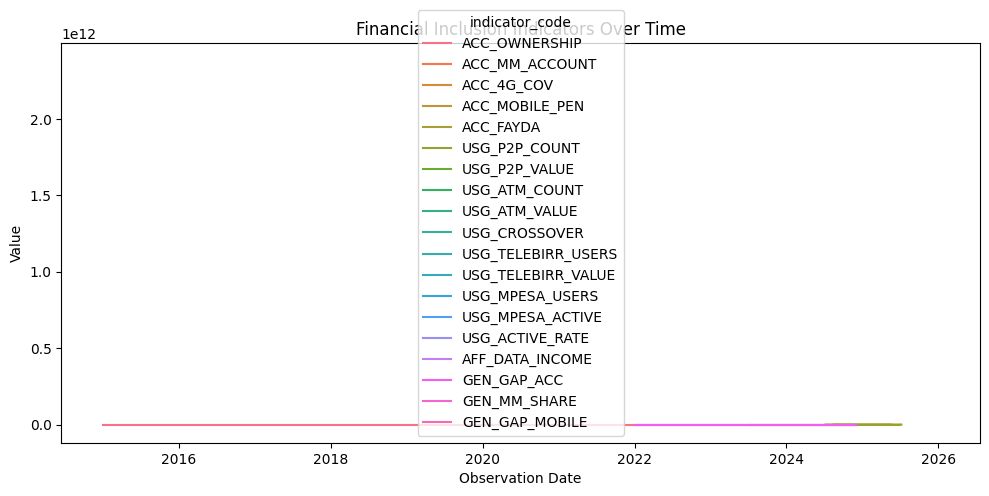

In [7]:
# 8. Simple visualization example
plt.figure(figsize=(10, 5))
sns.lineplot(
    data=observations,
    x='observation_date',
    y='value_numeric',
    hue='indicator_code'
)
plt.title("Financial Inclusion Indicators Over Time")
plt.xlabel("Observation Date")
plt.ylabel("Value")
plt.tight_layout()
plt.show()
